### 1. What is our independent variable? What is our dependent variable?

Independent variable - number of correctly spoken out loud colors of the ink in which the words are printed   
Dependent variable - time

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**H0: (µ_time_C = µ_time_I)**  
Population mean of the time required to read congruent words is equal to the population mean of the time required to read incongruent words  

**H1: (µ_time_C ≠ µ_time_I)**  
Population mean of the time required to read congruent words differs from the population mean of the time required to read incongruent words

We are comparing these two values in order to see if congruency affects the time required to say out loud all the colors from the word list.  

I intend to perform **two-tailed** t-test.   
t-test is used in situations when we don't have information on population mean and standard deviation - just the samples.  
This is an example of **repeated measures design**.


### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [6]:
import numpy as np
import pandas as pd

stroop_data = pd.read_csv('stroopdata.csv', sep=',')

congruent_values = stroop_data["Congruent"].values
congruent_mean = np.mean(congruent_values)
congruent_st_dev = np.std(congruent_values, ddof=1)

incongruent_values = stroop_data["Incongruent"].values
incongruent_mean = np.mean(incongruent_values)
incongruent_st_dev = np.std(incongruent_values, ddof=1)

print "Congruent:"
print "This is the mean (central tendency): " + str(congruent_mean)
print "This is the median (central tendency): " + str(np.median(congruent_values))
print "\nThis is standard deviation (variability): " + str(congruent_st_dev)
print "This is variance (variability): " + str(np.var(congruent_values))

print "\n\n\nIncongruent:"
print "This is the mean (central tendency): " + str(incongruent_mean)
print "This is the median (central tendency): " + str(np.median(incongruent_values))
print "\nThis is standard deviation (variability): " + str(incongruent_st_dev)
print "This is variance (variability): " + str(np.var(incongruent_values))

Congruent:
This is the mean (central tendency): 14.051125
This is the median (central tendency): 14.3565

This is standard deviation (variability): 3.55935795765
This is variance (variability): 12.1411528594



Incongruent:
This is the mean (central tendency): 22.0159166667
This is the median (central tendency): 21.0175

This is standard deviation (variability): 4.79705712247
This is variance (variability): 22.0529338264


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

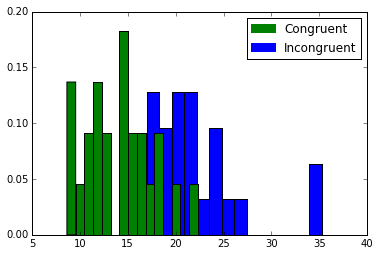

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.hist(incongruent_values, 15, histtype='bar', color="blue", normed=1)
plt.hist(congruent_values, 15, histtype='bar', color="green", normed=1)

red_patch = mpatches.Patch(color='green', label='Congruent')
blue_patch = mpatches.Patch(color='blue', label='Incongruent')
plt.legend(handles=[red_patch, blue_patch])

Data seems to be normally distributed.  
Mean of the incongruent samples is greater than the mean of the congruent samples.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Confidence level **alpha = 0.05**  
Crirical statistic value **t_critical = ± 2.069**   

#### Calculating t:

In [105]:
sample_size = len(incongruent_values) # 24
sample_mean_difference = incongruent_mean - congruent_mean # 7.96479166667
sample_difference = incongruent_values - congruent_values
sample_difference_std = np.std(sample_difference, ddof=1) # 4.86482691036

t = sample_mean_difference / (sample_difference_std / (sample_size ** 0.5))

#print sample_size
#print sample_mean_difference
#print sample_difference
#print sample_difference_std
print "Calculated t value: "
print t

Calculated t value: 
8.02070694411


Calculated t value is way beyond t_critical value and hence this is evidence in support of H1 hypothesis.  
**Null hypothesis should be rejected.**  

Based on my personal test and previous knowledge of this effect I expected that time required to read incongruent values would be greater than when reading congruent values.  
**The results matched with my expectations.**

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think that the effect is visible because of the way our brain works and how we recognize patterns.  
It seems that, given two competing things to recognize in the same time, we can more easily recognize words (or shapes) than colors.  

First thing that crossed my mind was whether the stroop efect was visible in numbers.  
And my hypothesis was that it would influence time required to say out loud the color if the color was read from colored numbers with respect to reading a color form say colored rectangle. 

By searching "stroop effect in numbers" I found the following link:  
http://scienceblogs.com/cognitivedaily/2006/05/22/if-you-thought-the-stroop-effe/  
It seems that similar effect is visible when comparing two negative numbers.  
Data showed that it takes longer to compare two negtive numbers than two positive numbers.


### Resources used outside Udacity

For plotting the data I used matplotlib documentation:  
http://matplotlib.org/users/legend_guide.html  

I also used some of the content from this blog for plotting:  
https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/